In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [5]:
import datetime
from dateutil.parser import parse as parse_date

In [66]:
confirmed = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

# Current date

In [69]:
firstday = parse_date(confirmed.columns[4])
today = parse_date(confirmed.columns[-1])
print('Today: ', today)
numdays = (today - firstday).days+1
print('NumDays: ', numdays)

Today:  2020-03-09 00:00:00
NumDays:  48


In [70]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
def changeColumns(df):
    df.drop(['Lat', 'Long'], axis=1, inplace=True)
    df.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)
changeColumns(confirmed)
changeColumns(deaths)
changeColumns(recovered)

In [72]:
confirmed

,province,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,1,9,15,39,60,70,106,152,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,14,22,36,41,68,80,91,111,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,6,9,27,57,75,110,132,147,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,1,5,10,18,35,59,80,84,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,0,2,2,4,7,14,19,24,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
confirmed[~confirmed['province'].isnull()].country.value_counts()

US                116
Mainland China     31
Australia           8
Canada              4
Macau               1
Taiwan              1
Others              1
Hong Kong           1
Name: country, dtype: int64

In [74]:
confirmed[confirmed.country.str.contains('Others')]

,province,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
65,Diamond Princess cruise ship,Others,0,0,0,0,0,0,0,0,...,705,705,705,706,706,706,696,696,696,696


In [75]:
def sumProvinces(df):
    df = df.copy()
    
    # remove country which has the DiamondPrincess
    df = df[~df.country.str.contains('Others')]
    
    # Sum all provinces for all countries
    # df_no_uc = df[~((df.country == 'Mainland China') |  (df.country == 'US'))]
    # df_no_uc = df.copy()
    df_united = df.groupby('country').sum()
    
    idx_list = df_united.index.tolist()
    pos = idx_list.index('Mainland China')
    idx_list[pos] = 'Mainland China/Total'
    pos = idx_list.index('US')
    idx_list[pos] = 'US/Total'
    df_united.index = idx_list
    
    df_united.index.rename('place', inplace=True)

    df_uc = df[((df.country == 'Mainland China') |  (df.country == 'US'))]
    df_uc = df_uc[~df_uc.province.str.contains('Diamond Princess')]
    df_uc['place'] = df_uc['country'] + '/' + df_uc.province.apply(lambda x: x.split(', ')[-1])
    df_uc.drop(['province', 'country'], axis=1, inplace=True)
    # We need to sum because US provinces repeat
    df_uc_sum = df_uc.groupby('place').sum()
    # df_uc.set_index('place', inplace=True)
    
    ret = pd.concat([df_united, df_uc_sum])
    ret.columns = [parse_date(x) for x in ret.columns]
    return ret
con = sumProvinces(confirmed)
rec = sumProvinces(recovered)
dea = sumProvinces(deaths)

In [76]:
con

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
place,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,3,5,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,2,8,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US/UT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
US/VA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
US/VT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [77]:
def plot1(df):
    df.sort_values(today, ascending=False).T.plot()

# Confirmed count China per province
## Hubei doesn't have new cases, full quarantine worked
Total and Hubei scale hides the other province counts.

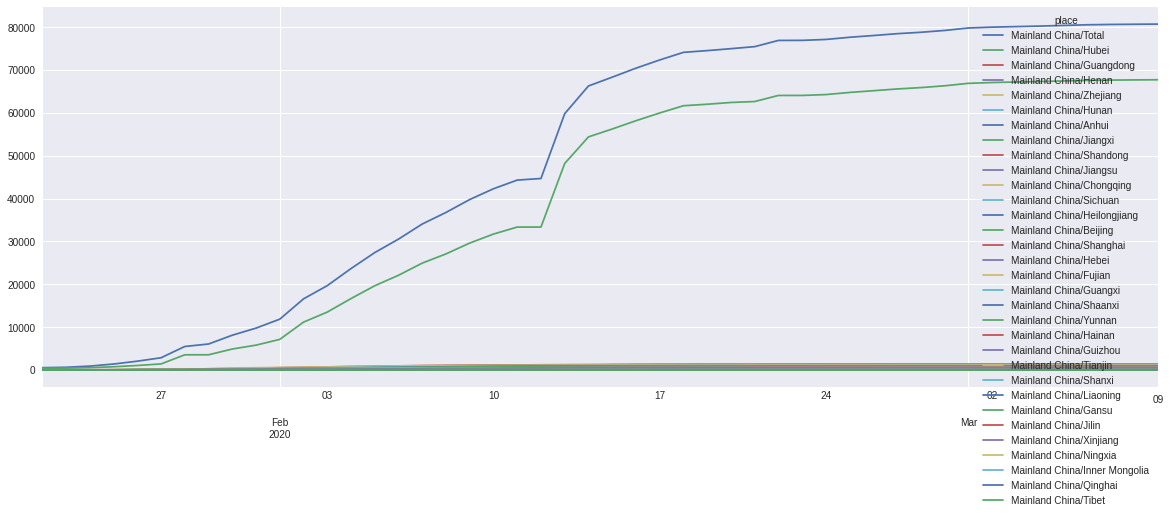

In [78]:
plot1(con[con.index.str.contains('China')])

# Non Hubei confirmed counts in China
## Other Chinase provinces managed
They were in simillar situation like European countries in middle february.
They managed to contain AFAIK without full quarantine.

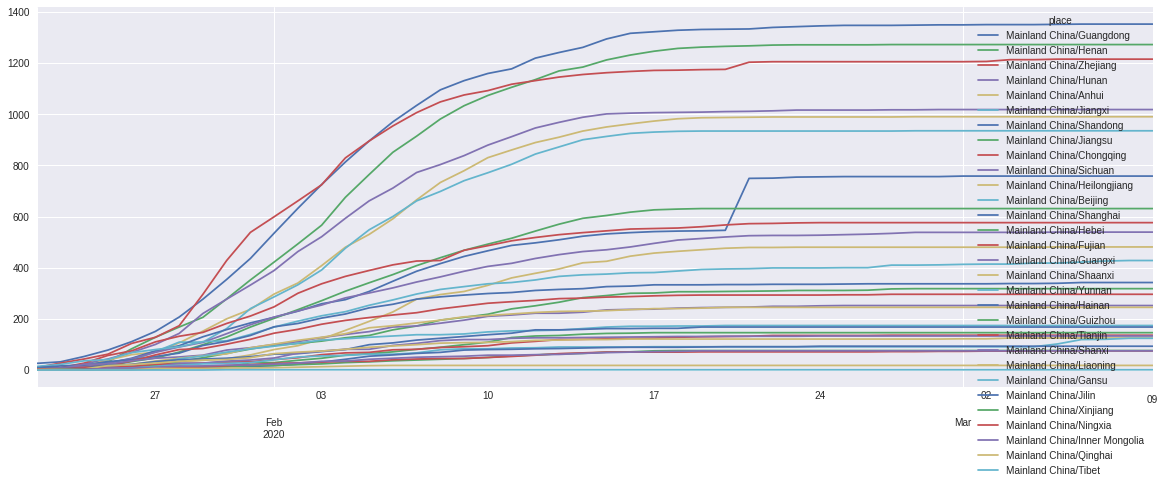

In [79]:
plot1(con[con.index.str.contains('China') & (~con.index.str.contains('Hubei')) & (~con.index.str.contains('Total'))])

In [99]:
def plot3(country, days=numdays, logy=False):
    fig, ax = plt.subplots()
    ax.plot(con[con.index.str.contains(country)][con.columns[-days:]].T, color='blue', label='Confirmed')
    ax.plot((dea[dea.index.str.contains(country)][con.columns[-days:]]).T, color='red', label='Dead')
    ax.plot((rec[rec.index.str.contains(country)][con.columns[-days:]]).T, color='green', label='recovered')
    if logy:
        ax.semilogy()
    ax.legend()

# Chinase death and recovered numbers make the confirmed number believable

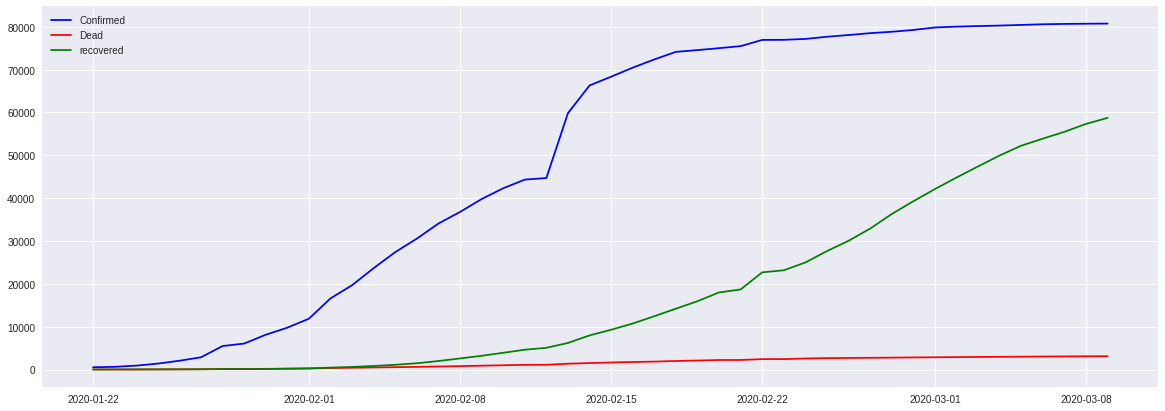

In [100]:
plot3('China/Total')


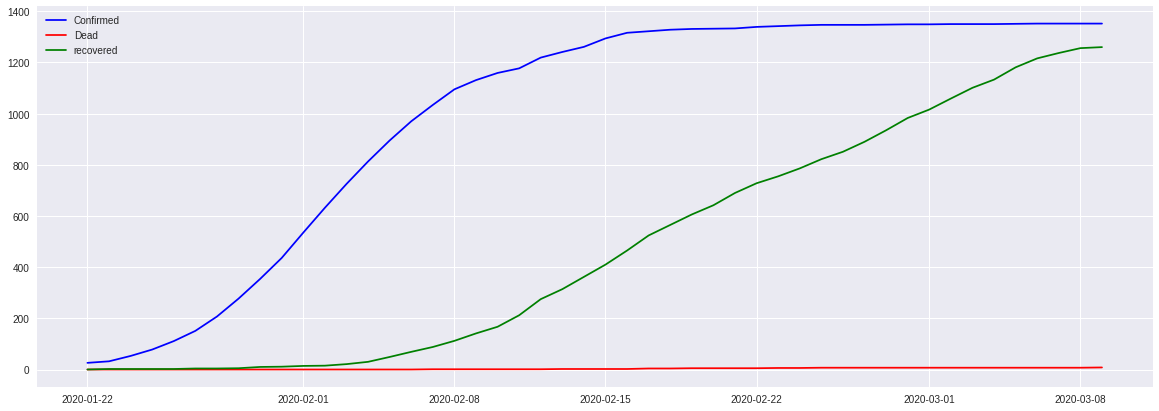

In [101]:
plot3('China/Guangdong')

# Let's check South Korea
Confirmed count makes the dead and recovered seem negligable.

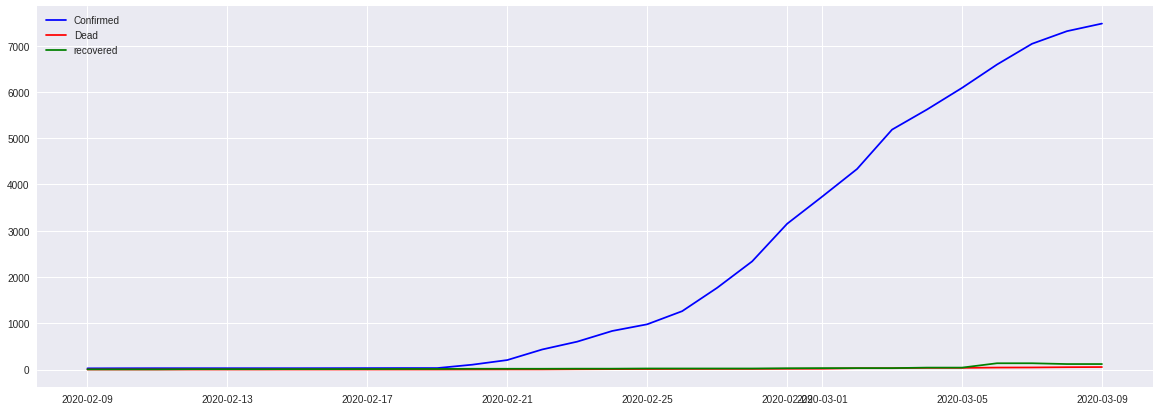

In [102]:
plot3('South Korea', days=30)

# Italy
Confirmed count makes the dead and recovered is visible, **probably confirmed count is far from actual**.

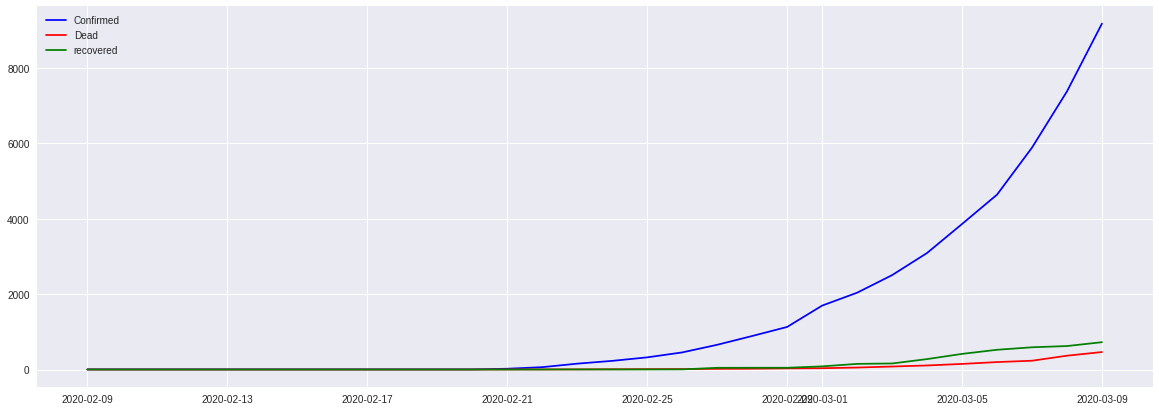

In [103]:
plot3('Italy', days=30)

# Let's try to guess actual counts from death counts
We have enough deaths for statistics to make sense

In [112]:
dea.loc['South Korea'][-5:]

2020-03-05    35
2020-03-06    42
2020-03-07    44
2020-03-08    50
2020-03-09    53
Name: South Korea, dtype: int64

## Let's find good T (Time to Death) and CFR (Case Fatality Ratio).
Initial estimates from reading around would be T=9 CFR=0.034 (3.4%)

https://www.worldometers.info/coronavirus/coronavirus-death-rate/ ("With a conservative estimate of T = 7 days")

https://www.aljazeera.com/news/2020/02/infected-coronavirus-200210205212755.html  ("By the ninth day, he had developed pneumonia and reported difficulty breathing.")

### But while tuning T and CFR on Korea and China I decided to go with 2%
For South Korea 1.5% would be the good one, in China 3.7% currently.


In [151]:
T=9 # Time to death
CFR=0.02 # Case Fatality Ratio
def backGuess(country, t=T, cfr=CFR):
    return pd.DataFrame({'confirmed': con.loc[country], 'backguess': (1/cfr)*dea.loc[country].shift(-t)})


# South Korea backguess 1.5%

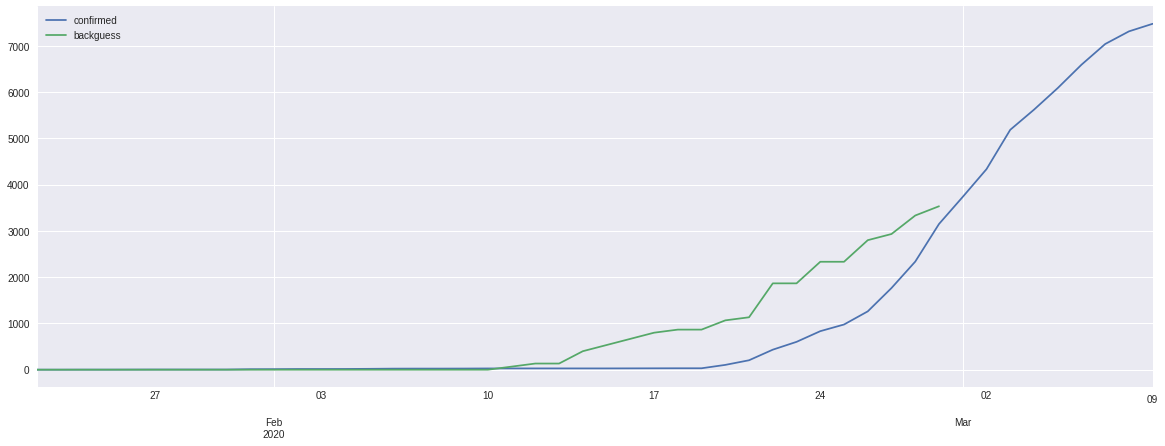

In [154]:
backGuess('South Korea', cfr=0.015).plot()

Log South Korea backguess

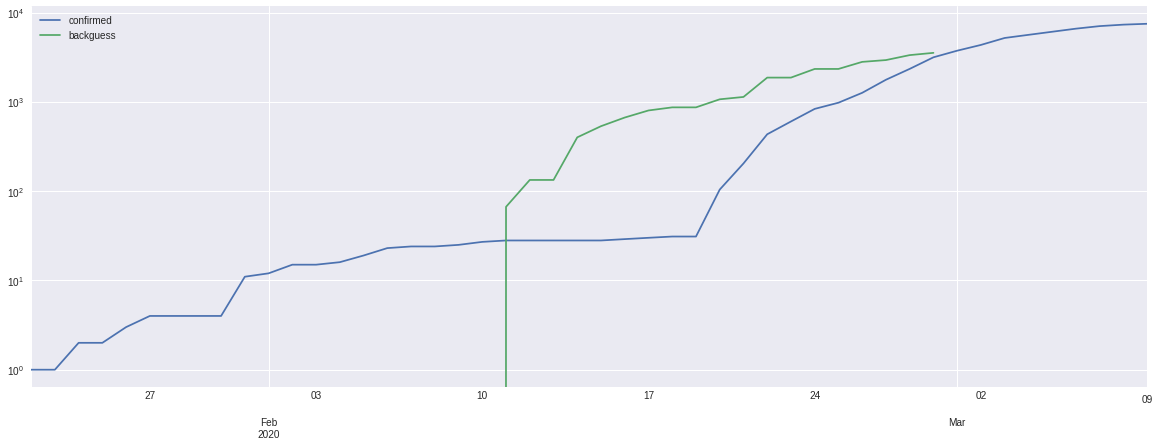

In [155]:
backGuess('South Korea', cfr=0.015).plot(logy=True)

# China backguess 3.7%

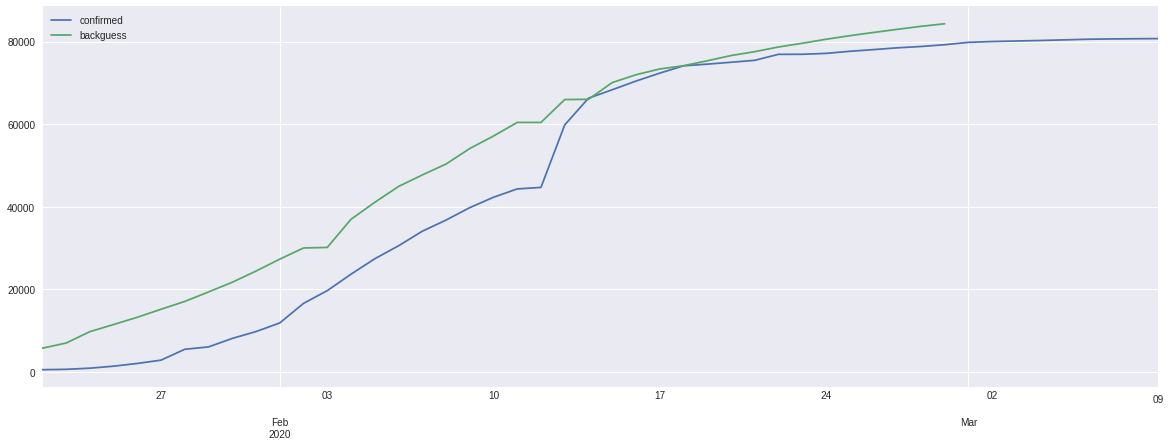

In [159]:
backGuess('Mainland China/Total', cfr=0.037).plot()

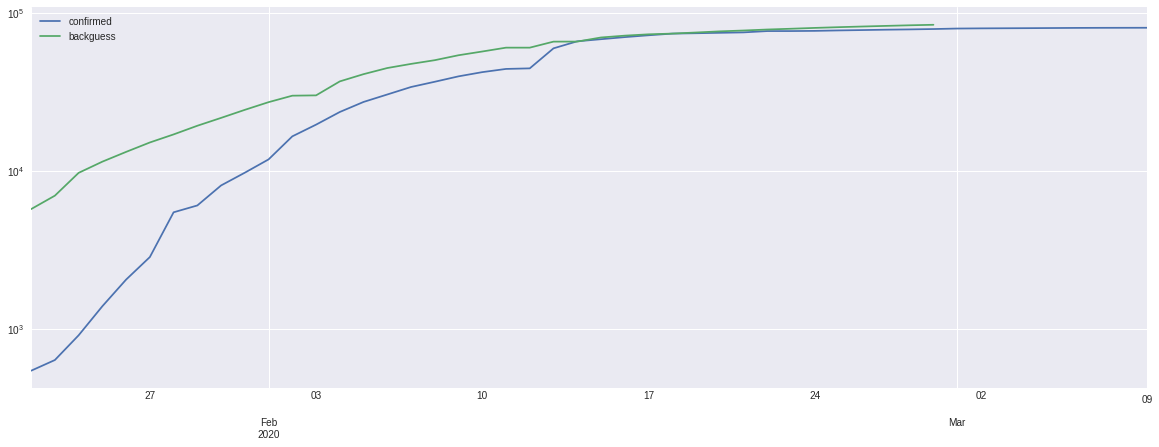

In [158]:
backGuess('Mainland China/Total', cfr=0.037).plot(logy=True)

# Italy
Confirmed cases clearly far from actual.

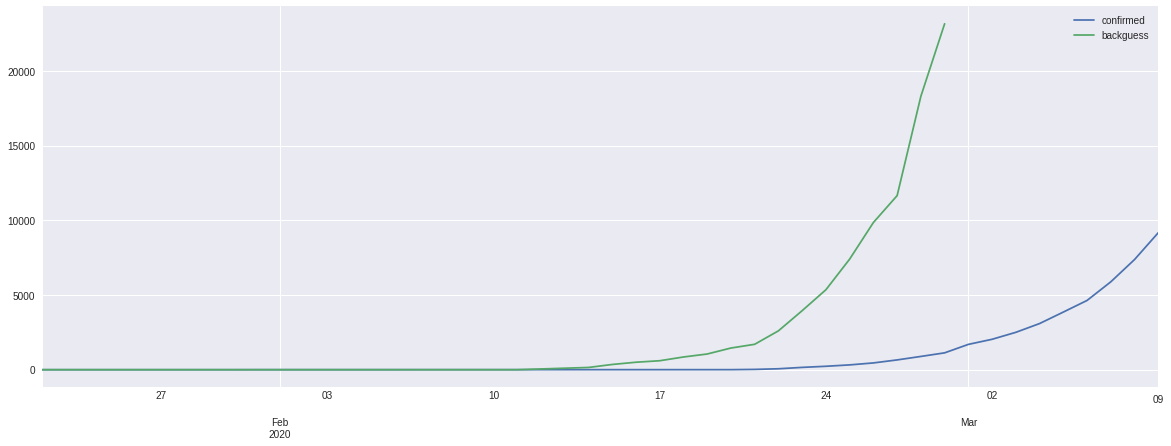

In [162]:
backGuess('Italy').plot()

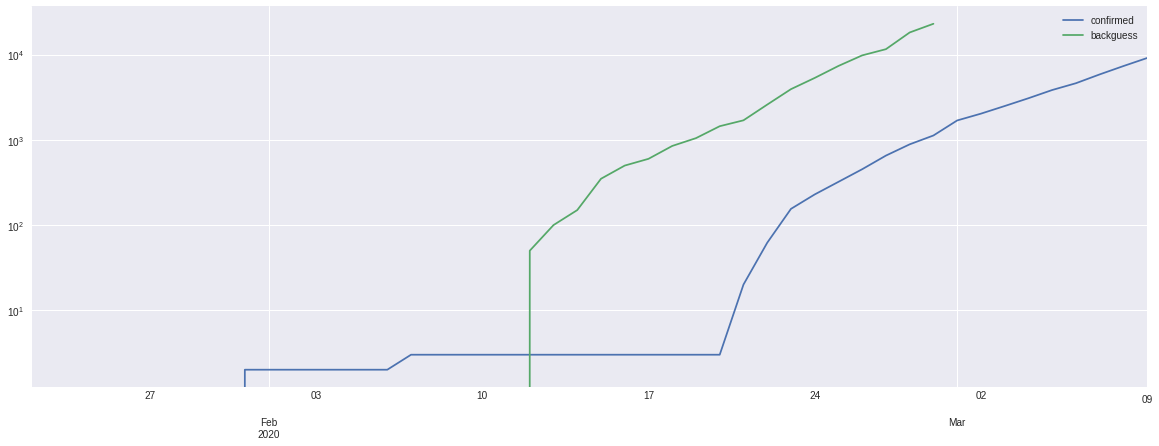

In [163]:
backGuess('Italy').plot(logy=True)

# Let's try to guess actual cases.
We guess that there were 23K acutal cases instead of 1.12K confirmed cases on 02-29

In [231]:
italy_allback = backGuess('Italy')
itback = italy_allback[:-T][-20:]
itback.T

,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
confirmed,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,20.0,62.0,155.0,229.0,322.0,453.0,655.0,888.0,1128.0
backguess,0.0,0.0,50.0,100.0,150.0,350.0,500.0,600.0,850.0,1050.0,1450.0,1700.0,2600.0,3950.0,5350.0,7400.0,9850.0,11650.0,18300.0,23150.0


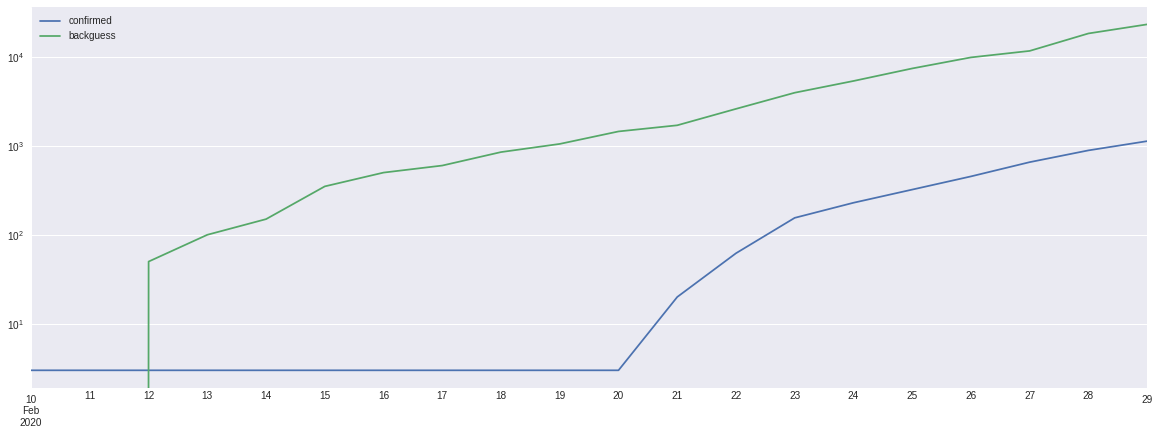

In [232]:
itback.plot(logy=True)

# Let's say the daily growth rate is *1.3 extrapolating from death count

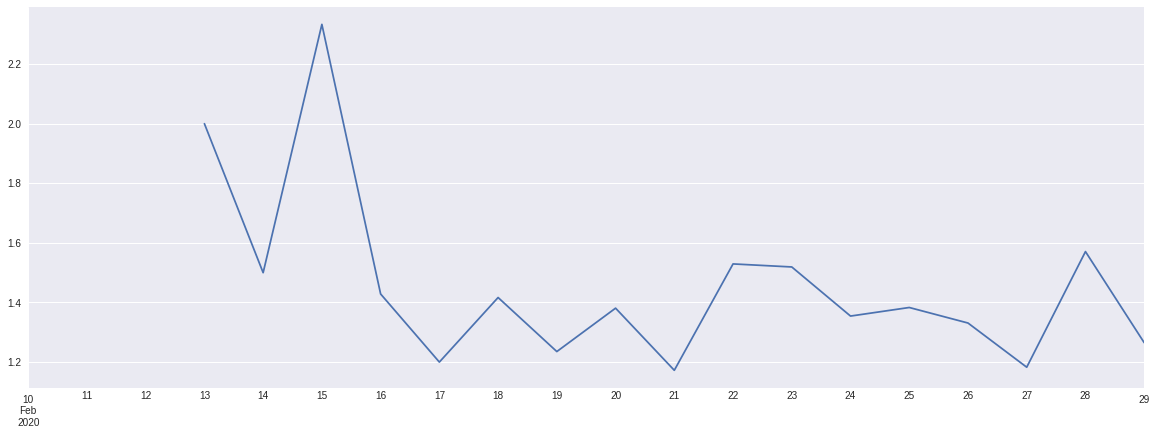

In [233]:
(itback.backguess / itback.backguess.shift()).plot()

# *1.3 is a good guess from confirmed cases too.

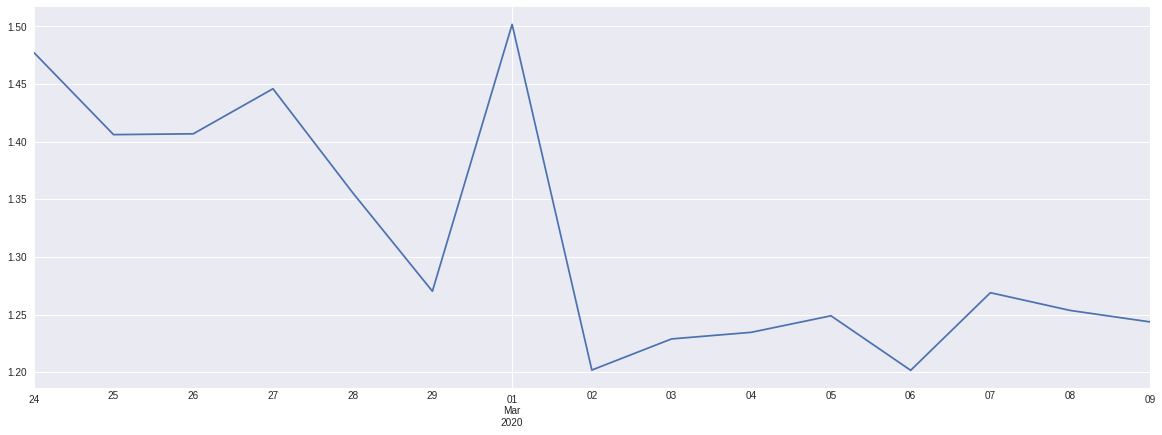

In [234]:
(italy_allback.confirmed / italy_allback.confirmed.shift())[-15:].plot()

# This would estimate currently 200K actual cases in Italy (3% of country)

In [241]:
growth = 1.3
print("Last guess T days ago:", itback.backguess[-1])
print("Extrapolating from that:", itback.backguess[-1] * 1.3**T)

print("T days ago confirmed actual ratio was: ", itback.backguess[-1] / itback.confirmed[-1])
print("Extrapolating from that: ", italy_allback.confirmed[-1] * (itback.backguess[-1] / itback.confirmed[-1]))


Last guess T days ago: 23150.0
Extrapolating from that: 245494.16048495006
T days ago confirmed actual ratio was:  20.52304964539007
Extrapolating from that:  188237.41134751771


# France - The deatchcount is much smaller, the result is noisy

In [243]:
fr_allback = backGuess('France')
fr_back = fr_allback[:-T][-20:]
fr_back.T

,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
confirmed,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,14.0,18.0,38.0,57.0,100.0
backguess,50.0,50.0,50.0,50.0,50.0,50.0,50.0,100.0,100.0,100.0,100.0,100.0,150.0,200.0,200.0,300.0,450.0,550.0,950.0,950.0


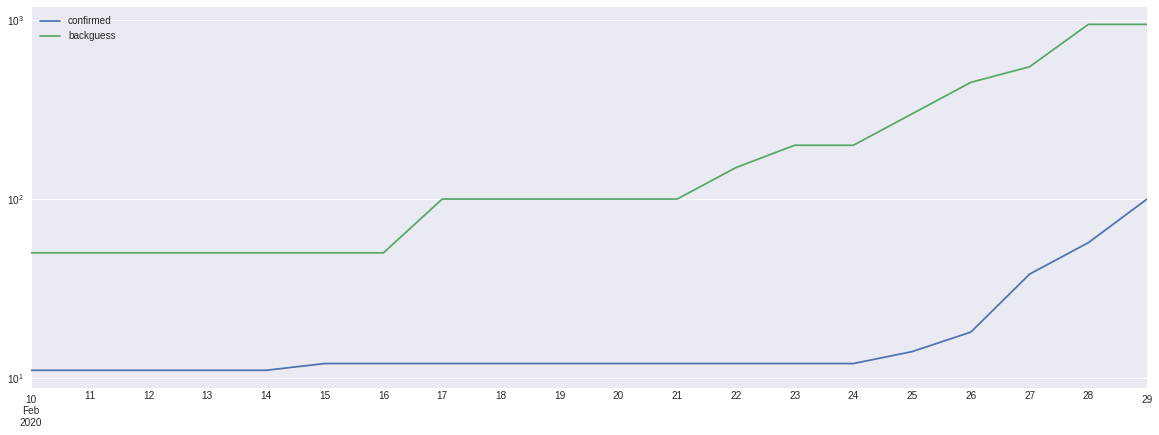

In [244]:
fr_back.plot(logy=True)

# *1.3 is reasonable here too

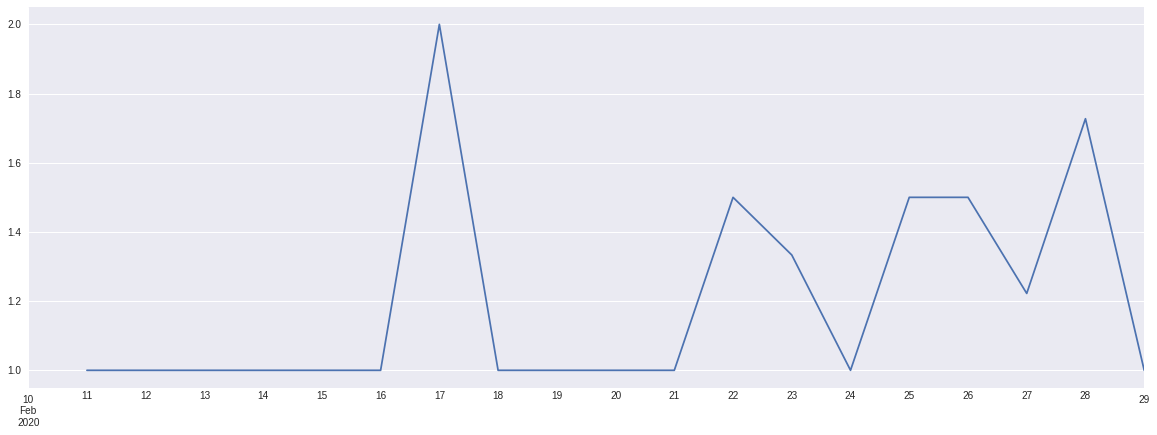

In [245]:
(fr_back.backguess / fr_back.backguess.shift()).plot()

# This would estimate currently 10K actual cases in France (0.15% of country)

In [246]:
growth = 1.3
print("Last guess T days ago:", fr_back.backguess[-1])
print("Extrapolating from that:", fr_back.backguess[-1] * 1.3**T)

print("T days ago confirmed actual ratio was: ", fr_back.backguess[-1] / fr_back.confirmed[-1])
print("Extrapolating from that: ", fr_allback.confirmed[-1] * (fr_back.backguess[-1] / fr_back.confirmed[-1]))

Last guess T days ago: 950.0
Extrapolating from that: 10074.274404350002
T days ago confirmed actual ratio was:  9.5
Extrapolating from that:  11485.5


# Switzerland - We don't have deaths, so no idea yet. Let's check in a few days.

In [251]:
ch_allback = backGuess('Switzerland')
ch_back = ch_allback[:-T][-20:]
ch_back.T

,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
confirmed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,8.0,18.0
backguess,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,100.0,100.0


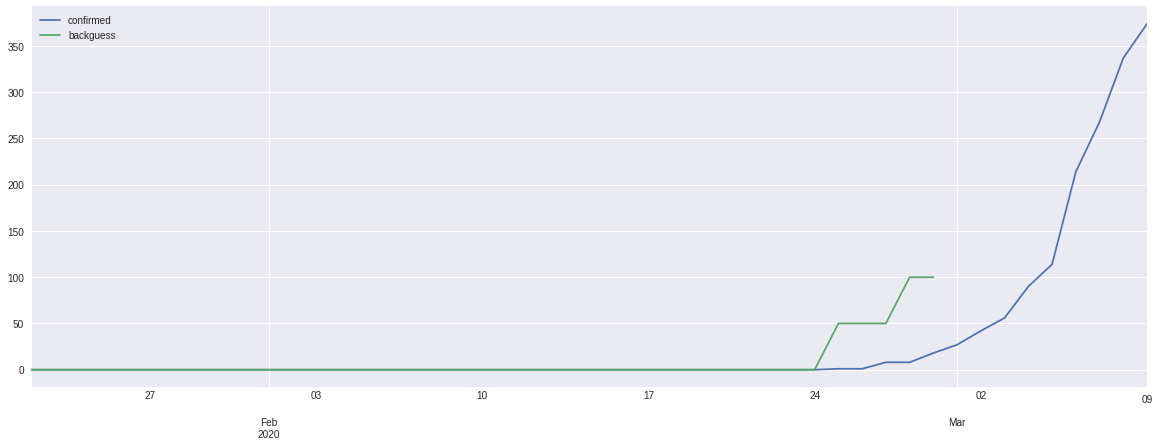

In [254]:
ch = backGuess('Switzerland')
ch.plot()